# 1. Define:

###**(a) Subgraph**

Subgraph são parcelas de um gráfico completo, trata-se de uma nova plotagem com alguns nós e arestas de um gráfico completo, 
quase como se fosse um Zoom-in de um gráfico.

###**(b) Bipartite graph.**

Gráficos bipartidos são gráficos grupos de gráficos separados que seus nós se conectam, similar a relação de conjuntos, 
de um grupo A que se relacionam com um Grupo B

###**(c) Hamiltonian graph**

Um Gráfico hamiltoniano é tal que um caminho possa ser traçado passando por todas os nós sem que nenhuma passagem se repita, 
ou seja nenhum só servirá de caminho mais de uma vez.

###**(d) Eulerian graph**

Um gráfico euleriano é similar ao gráfico hamiltoniano com a diferença de que desta vez nenhuma aresta possa se repetir, 
ou seja um caminho passando por cada aresta uma unica vez, no gráfico euleriano o caminho deve se iniciar de um ponto e terminar no mesmo.


#2. Describe how a breadth-first search algorithm works.

Um gráfico euleriano é similar ao gráfico hamiltoniano com a diferença de que desta vez nenhuma aresta possa se repetir, 
ou seja um caminho passando por cada aresta uma unica vez, no gráfico euleriano o caminho deve se iniciar de um ponto e terminar no mesmo.

#3. How many edges does a complete graph with n vertices have? What about a complete directed graph with n vertices?

para um grafo completo de n vértices temos:(n*n(-1))/2 
já em um grafo direcionado com n vértices, cada vértice pode se conectar a n-1 outros vértices, portanto terá: n(n - 1)

#4. What are isomorphic graphs? Draw an example.

grafos isomórficos são grafos nas quais todos os nós tems o mesmo grau e correspondentes um a um entre seus vertices.

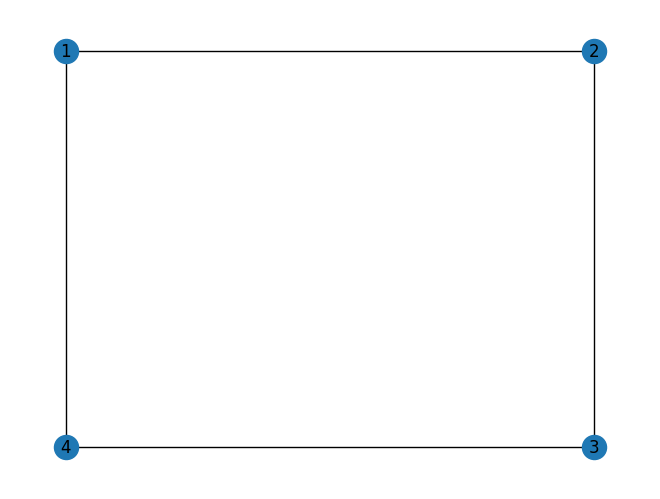

In [49]:
import networkx as nx
import matplotlib.pyplot as plt

#cria um grafo vazio
G = nx.Graph()

#adiciona as arestas
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 1)

#desenha o grafo (COLUNA X LINHA)
posiçao = {1: (0, 1), 2: (1, 1), 3: (1, 0), 4: (0, 0)}
nx.draw(G, posiçao, with_labels=True)

#plotando
plt.show()



#5. Calculate the degree of the nodes for both node types in the bipartite adjacency matrix from the figure below. Find the isolated node(s).

Valores em Dicionário (Nó : degree de entrada/saida do nó)

Graus de entrada: {0: 1, 1: 2, 2: 3, 3: 1, 4: 1, 5: 2, 6: 4, 7: 1, 8: 3}

Graus de saída: {0: 2, 1: 3, 2: 4, 3: 2, 4: 3, 5: 1, 6: 0, 7: 2, 8: 1}

Nós isolados: [nenhum]

Graus de entrada: {0: 1, 1: 2, 2: 3, 3: 1, 4: 1, 5: 2, 6: 4, 7: 1, 8: 3}
Graus de saída: {0: 2, 1: 3, 2: 4, 3: 2, 4: 3, 5: 1, 6: 0, 7: 2, 8: 1}
Nós isolados: []


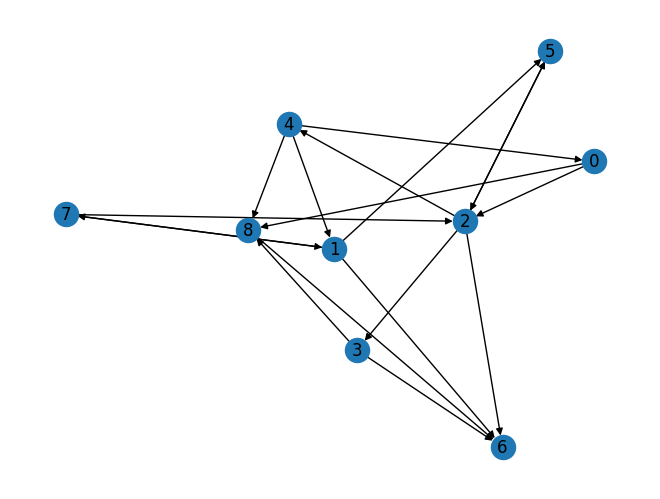

In [50]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#gerando matriz de adjacência
Matriz = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0]
])

# cria um grafo a partir da matriz de adjacência
G = nx.from_numpy_array(Matriz, create_using=nx.DiGraph)

#cria dicionarios com sequencia de chave-valor que significa o nó:grau do nó
degree_de_entrada = dict(G.in_degree())
degree_de_saida = dict(G.out_degree())

#encontra os nós isolados
nos_isolados = [node for node in G.nodes() if degree_de_entrada[node] == 0 and degree_de_saida[node] == 0]

#resultados
print("Graus de entrada:", degree_de_entrada)
print("Graus de saída:", degree_de_saida)
print("Nós isolados:", nos_isolados)

#motando desenho
nx.draw(G, with_labels=True)

#plotando
plt.show()

#6. Given the digraph G = (V, E) where V = {M, N, O, P, Q, R, S} and
E ={(M, S), (N, O), (P, R), (N, S), (O, M), (N, Q), (O, M), (P, P), (S, M), (O, N),  (S, M), (N, R), (P, M), (M, S)}


(a) Specify, if any, a simple path from vertex M to vertex S.

Sim, o caminho entre M e S de forma única existe, já que o menor caminho não, 
repetirá sua passagem por nenhum outro nó/vértice

(b) Specify, if any, a simple cycle, involving at least 4 nodes.

Sim, existe um ciclo simples, que utiiliza 4 nós (N, O, M, S), o ciclo faz o seguinte trajeto: N>O>M>S>N não repetindo nenhum nó tornando assim um ciclo simples.

(c) Is the digraph connected or not connected?

não conectado, existem vértices que não podem ser alcançados por outros vértices.

(d) What is the degree of vertices N and R.

N (4 de saída e 1 de entrada = grau 5)
R (0 de saída e 2 de entrada = grau 2)


(e) Represent the digraph using adjacency list representation.

Lista de Adjacência:
M > (S)
N > (O,R,S,Q)
O > (M,N)
P > (P,R,M)
Q > ()
R > ()
S > (M)

(f) Represent the digraph using adjacency matrix representation.

    M N O P Q R S
M   0 0 1 0 0 0 1
N   0 0 0 0 1 1 1
O   1 1 0 0 0 1 0
P   1 0 0 1 0 0 0
Q   0 0 0 0 0 0 0
R   0 0 0 0 0 0 0
S   1 1 0 1 0 0 0

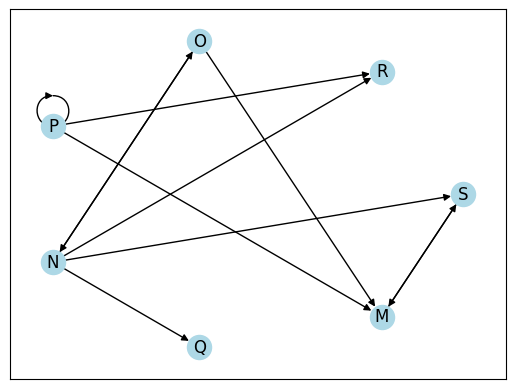

In [56]:
import networkx as nx
import matplotlib.pyplot as plt

#criando arrays com as configuraçoes dos nó's
V = {'M', 'N', 'O', 'P', 'Q', 'R', 'S'}
#criando arrays com as arestas
E = {('M', 'S'), ('N', 'O'), ('P', 'R'), ('N', 'S'), ('O', 'M'), ('N', 'Q'), 
     ('O', 'M'), ('P', 'P'), ('S', 'M'), ('O', 'N'), ('S', 'M'), ('N', 'R'), 
     ('P', 'M'), ('M', 'S')}

#adicionando os arrays com nó e aresta
G = nx.DiGraph()
G.add_nodes_from(V)
G.add_edges_from(E)

#a função circular_layout posicina os nós de forma circular, facilitando a visualização
posiçao = nx.circular_layout(G)
nx.draw_networkx_nodes(G, posiçao, node_color='lightblue')
nx.draw_networkx_edges(G, posiçao, edge_color='black')
nx.draw_networkx_labels(G, posiçao)

#plotando o grafo
plt.show()


#7. Draw the undirected and directed versions of the graph G(V, E), where V = {1, 2, 3, 4, 5, 6} and E = {(2, 5), (6, 1), (5, 3), (2, 3)}.

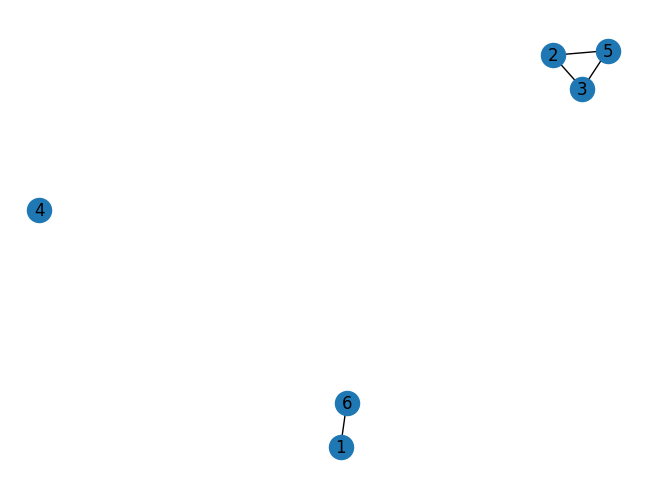

In [72]:
import networkx as nx
import matplotlib.pyplot as plt

V = {1, 2, 3, 4, 5, 6}
E = {(2, 5), (6, 1), (5, 3), (2, 3)}

direcionado = nx.DiGraph()
direcionado.add_nodes_from(V)
direcionado.add_edges_from(E)


n_direcionado = nx.Graph()
n_direcionado.add_nodes_from(V)
n_direcionado.add_edges_from(E)

#nx.draw(direcionado, with_labels=True)
nx.draw(n_direcionado, with_labels=True)


plt.show()


#8. How many edges does a graph have 3 vertices of degree 3 and one vertex of degree 5?


7 arestas

#9. Mr. A is friend with Mrs. B, but she doesn't like him back. She has a reciprocal friendship with both C and D, but only C considers D a friend. D has also sent friend requests to E, F, G, and H but, so far, only G replied. G also has a reciprocal relationship with A. Draw the corresponding directed graph.


*Obs: aqui fiquei com dúvida se a amizade de (G) e (D) é reciproca, então coloquei que (D) > (G), mas não o inverso.

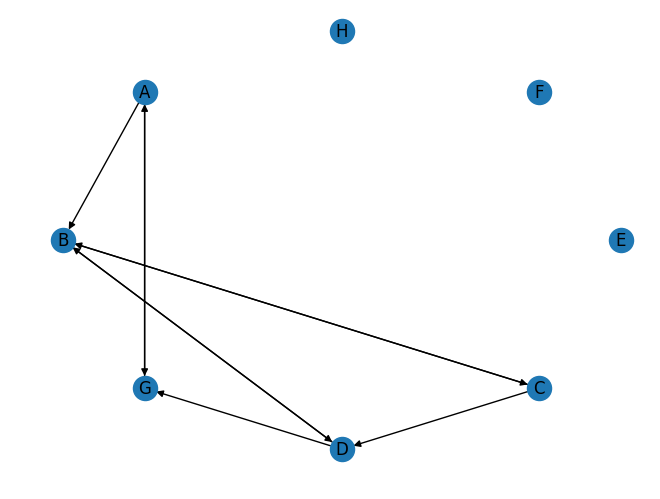

In [74]:
import networkx as nx
import matplotlib.pyplot as plt

vertice = {'A','B','C','D','E','F','G','H'}
aresta = {('A', 'B'), ('B', 'C'), ('C', 'B'), ('C', 'D'), ('B', 'D'), ('D', 'B'), 
     ('D', 'G'), ('A', 'G'), ('G', 'A')}

direcionado = nx.DiGraph()
direcionado.add_nodes_from(vertice)
direcionado.add_edges_from(aresta)

formato = nx.circular_layout(direcionado)
nx.draw(direcionado, formato, with_labels=True)

plt.show()

#10. Draw the graph from the previous exercise as undirected and weighted, with the weight being 2 if the connection is reciprocal, 1 otherwise.

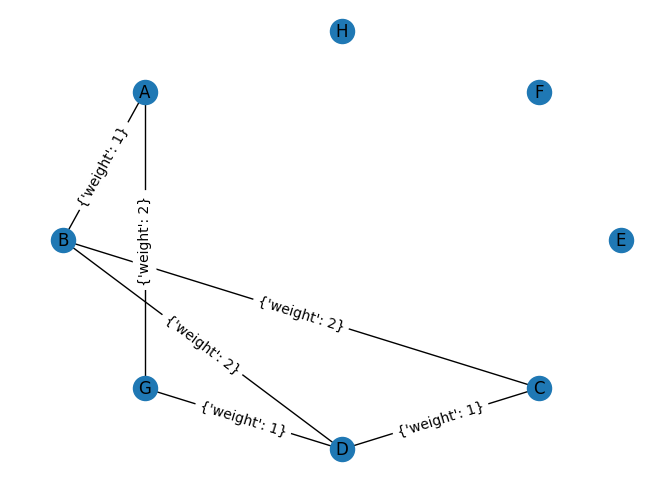

In [79]:
import networkx as nx
import matplotlib.pyplot as plt

vertice = {'A','B','C','D','E','F','G','H'}
aresta = {('A', 'B'), ('B', 'C'), ('C', 'B'), 
          ('C', 'D'), ('B', 'D'), ('D', 'B'), 
          ('D', 'G'), ('A', 'G'), ('G', 'A')}

n_direcionado = nx.Graph()
n_direcionado.add_nodes_from(vertice)

for u, v in aresta:
    if (u, v) in aresta and (v, u) in aresta:
        n_direcionado.add_edge(u, v, weight=2)
    else:
        n_direcionado.add_edge(u, v, weight=1)

formato = nx.circular_layout(n_direcionado)
nx.draw(n_direcionado, formato, with_labels=True)
nx.draw_networkx_edge_labels(n_direcionado, formato)

plt.show()